#   Analysis of the 04Cars dataset

### Load the 04Cars dataset as a DataFrame (Pandas library) and filter out the last 11 columns - they will be used as input for PCA.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
df = pd.read_csv("04cars-data.csv", header=0)

In [81]:
attributes = list(df.columns.values[-11:])
data = df.iloc[:,-11:]
array = data.values
attributes

['Retail Price',
 'Dealer Cost',
 'Engine Size (l)',
 'Cyl',
 'HP',
 'City MPG',
 'Hwy MPG',
 'Weight',
 'Wheel Base',
 'Len',
 'Width']

### Normalize the data, ensuring that for each characteristic the arithmetic mean is 0 and the variance is 1

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
array_norm = scaler.fit_transform(array)


### Perform the PCA transformation for the input dataset, and then show the dependence of the absolute and relative value of the variance on the leading direction number k. What proportion of the variance is retained when reducing the dimensionality to 2 and 3

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA()
X_pca = pca.fit_transform(array_norm)

In [85]:
pca_transformed = pca.transform(array_norm)

In [86]:
pca.explained_variance_

array([7.12304423e+00, 1.88880540e+00, 8.51929654e-01, 3.57940400e-01,
       2.76149157e-01, 1.98456523e-01, 1.40883248e-01, 8.68632648e-02,
       6.65599703e-02, 3.70731584e-02, 7.92402290e-04])

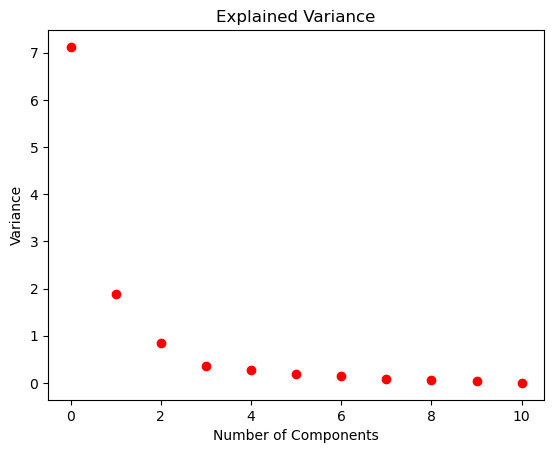

In [87]:
plt.plot(pca.explained_variance_, "ro")
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.show()


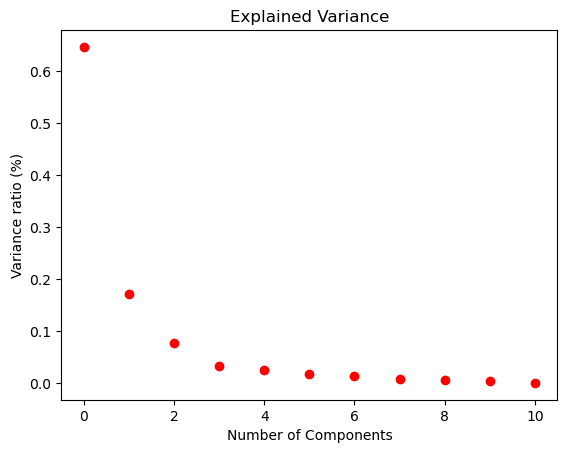

In [88]:
plt.plot(pca.explained_variance_ratio_, "ro")
plt.xlabel('Number of Components')
plt.ylabel('Variance ratio (%)')
plt.title('Explained Variance')
plt.show()
# variance decreases rapidly, When reducing to 2 / 3 leading dimensions, a small part of the variance remains (less than 10%)

### Display the values of the elements of the first and second leading components with their corresponding feature name. What do the elements with a value close to zero mean? What car properties are they associated with:

- The largest elements of the first leading component

- The smallest elements of the first leading component

- The largest elements of the second leading component

- The smallest elements of the second leading component

In [89]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print("Attribute, PC1, PC2")
for i in range(0,pc1.shape[0]):
    print(attributes[i] + ':' + repr(pc1[i]) + ':' + repr(pc2[i]))
    
# Elements with a value close to zero mean that the feature has little impact on the respective leading component.
# - The largest elements of the first leading component: Engine Size, Weight, HP, Cyl (negative meaning that the smaller the values, the greater the importance relative to the first component)

# - Smallest elements of the first leading component (I assume close to 0): Len, Retail Price, Dealer Cost

# - Largest elements of the second leading component: Retail Price, Dealer Cost

# - Smallest elements of the second leading component: Engine Size, HWY MPG, Weight

Attribute, PC1, PC2
Retail Price:-0.26375044344403414:0.46850869750253893
Dealer Cost:-0.2623186387530952:0.4701465851382261
Engine Size (l):-0.3470804920252008:-0.0153471864637132
Cyl:-0.3341887576286372:0.0780320108750188
HP:-0.31860225848402923:0.29221347613918214
City MPG:0.31048172673231283:-0.0033659357616593224
Hwy MPG:0.30658863858044433:-0.010964460145348656
Weight:-0.33632936694048804:-0.16746357154787012
Wheel Base:-0.2662100335710544:-0.41817710695920374
Len:-0.2567901876706824:-0.40841138066875426
Width:-0.29605459141706125:-0.3128913501625071


### Make a visualization of the feature vectors dropped on the first 2(3) leading components. Overlay the text with the car model on the graph. What types of cars appear in each part of the graph?

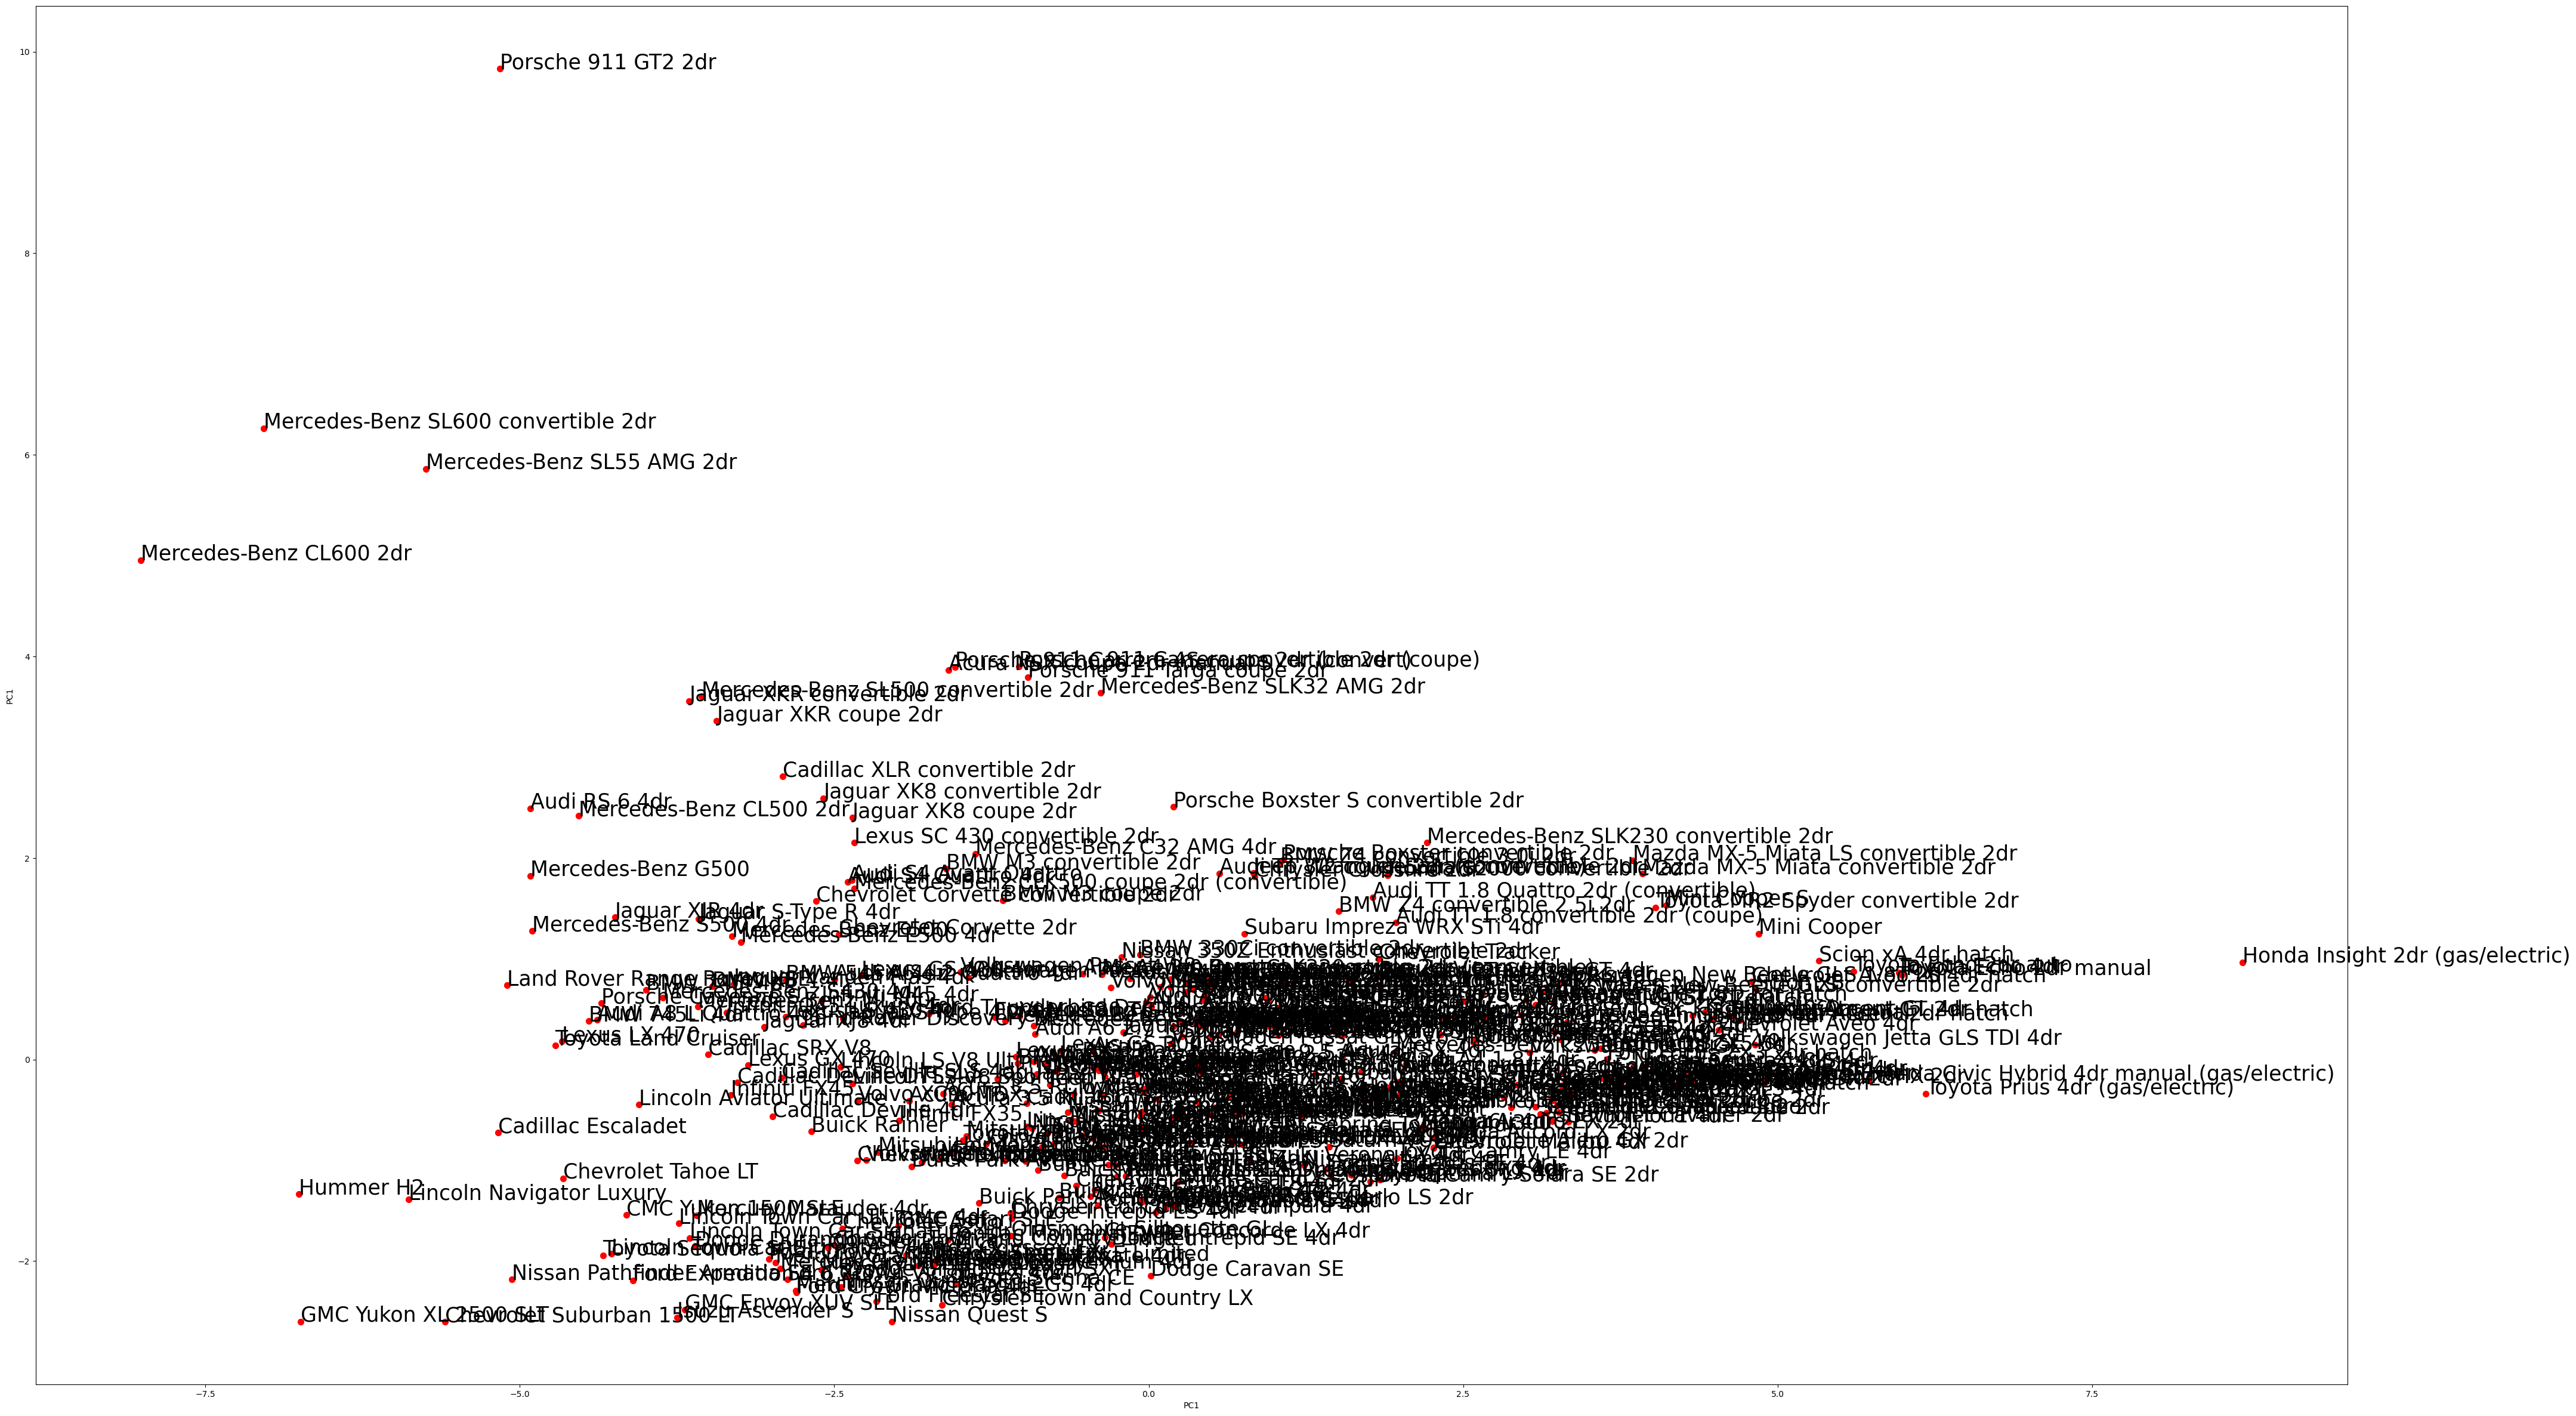

In [90]:
plt.figure(figsize=(50,30))
plt.xlabel("PC1")
plt.ylabel("PC1")
x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x,y)
labels = df.iloc[:,0 ]
for i,label in enumerate(labels):
    plt.annotate(label,(x[i],y[i]),size=25)
    plt.scatter(x[i], y[i], color='red', s=50) 
plt.show()

# Top left corner, high end cars, sports cars (Attributes Cyl, Dealer Cost, Retail Price).
# Bottom left, big cars, heavy cars 
# Right middle, economy cars , suitable for cities, (Hwy MPG, City MPG)

## On the same graph in 2D, present a reduced-size dataset with a visualization of the features dropped on the first 2 leading components. What does this type of visualization show?

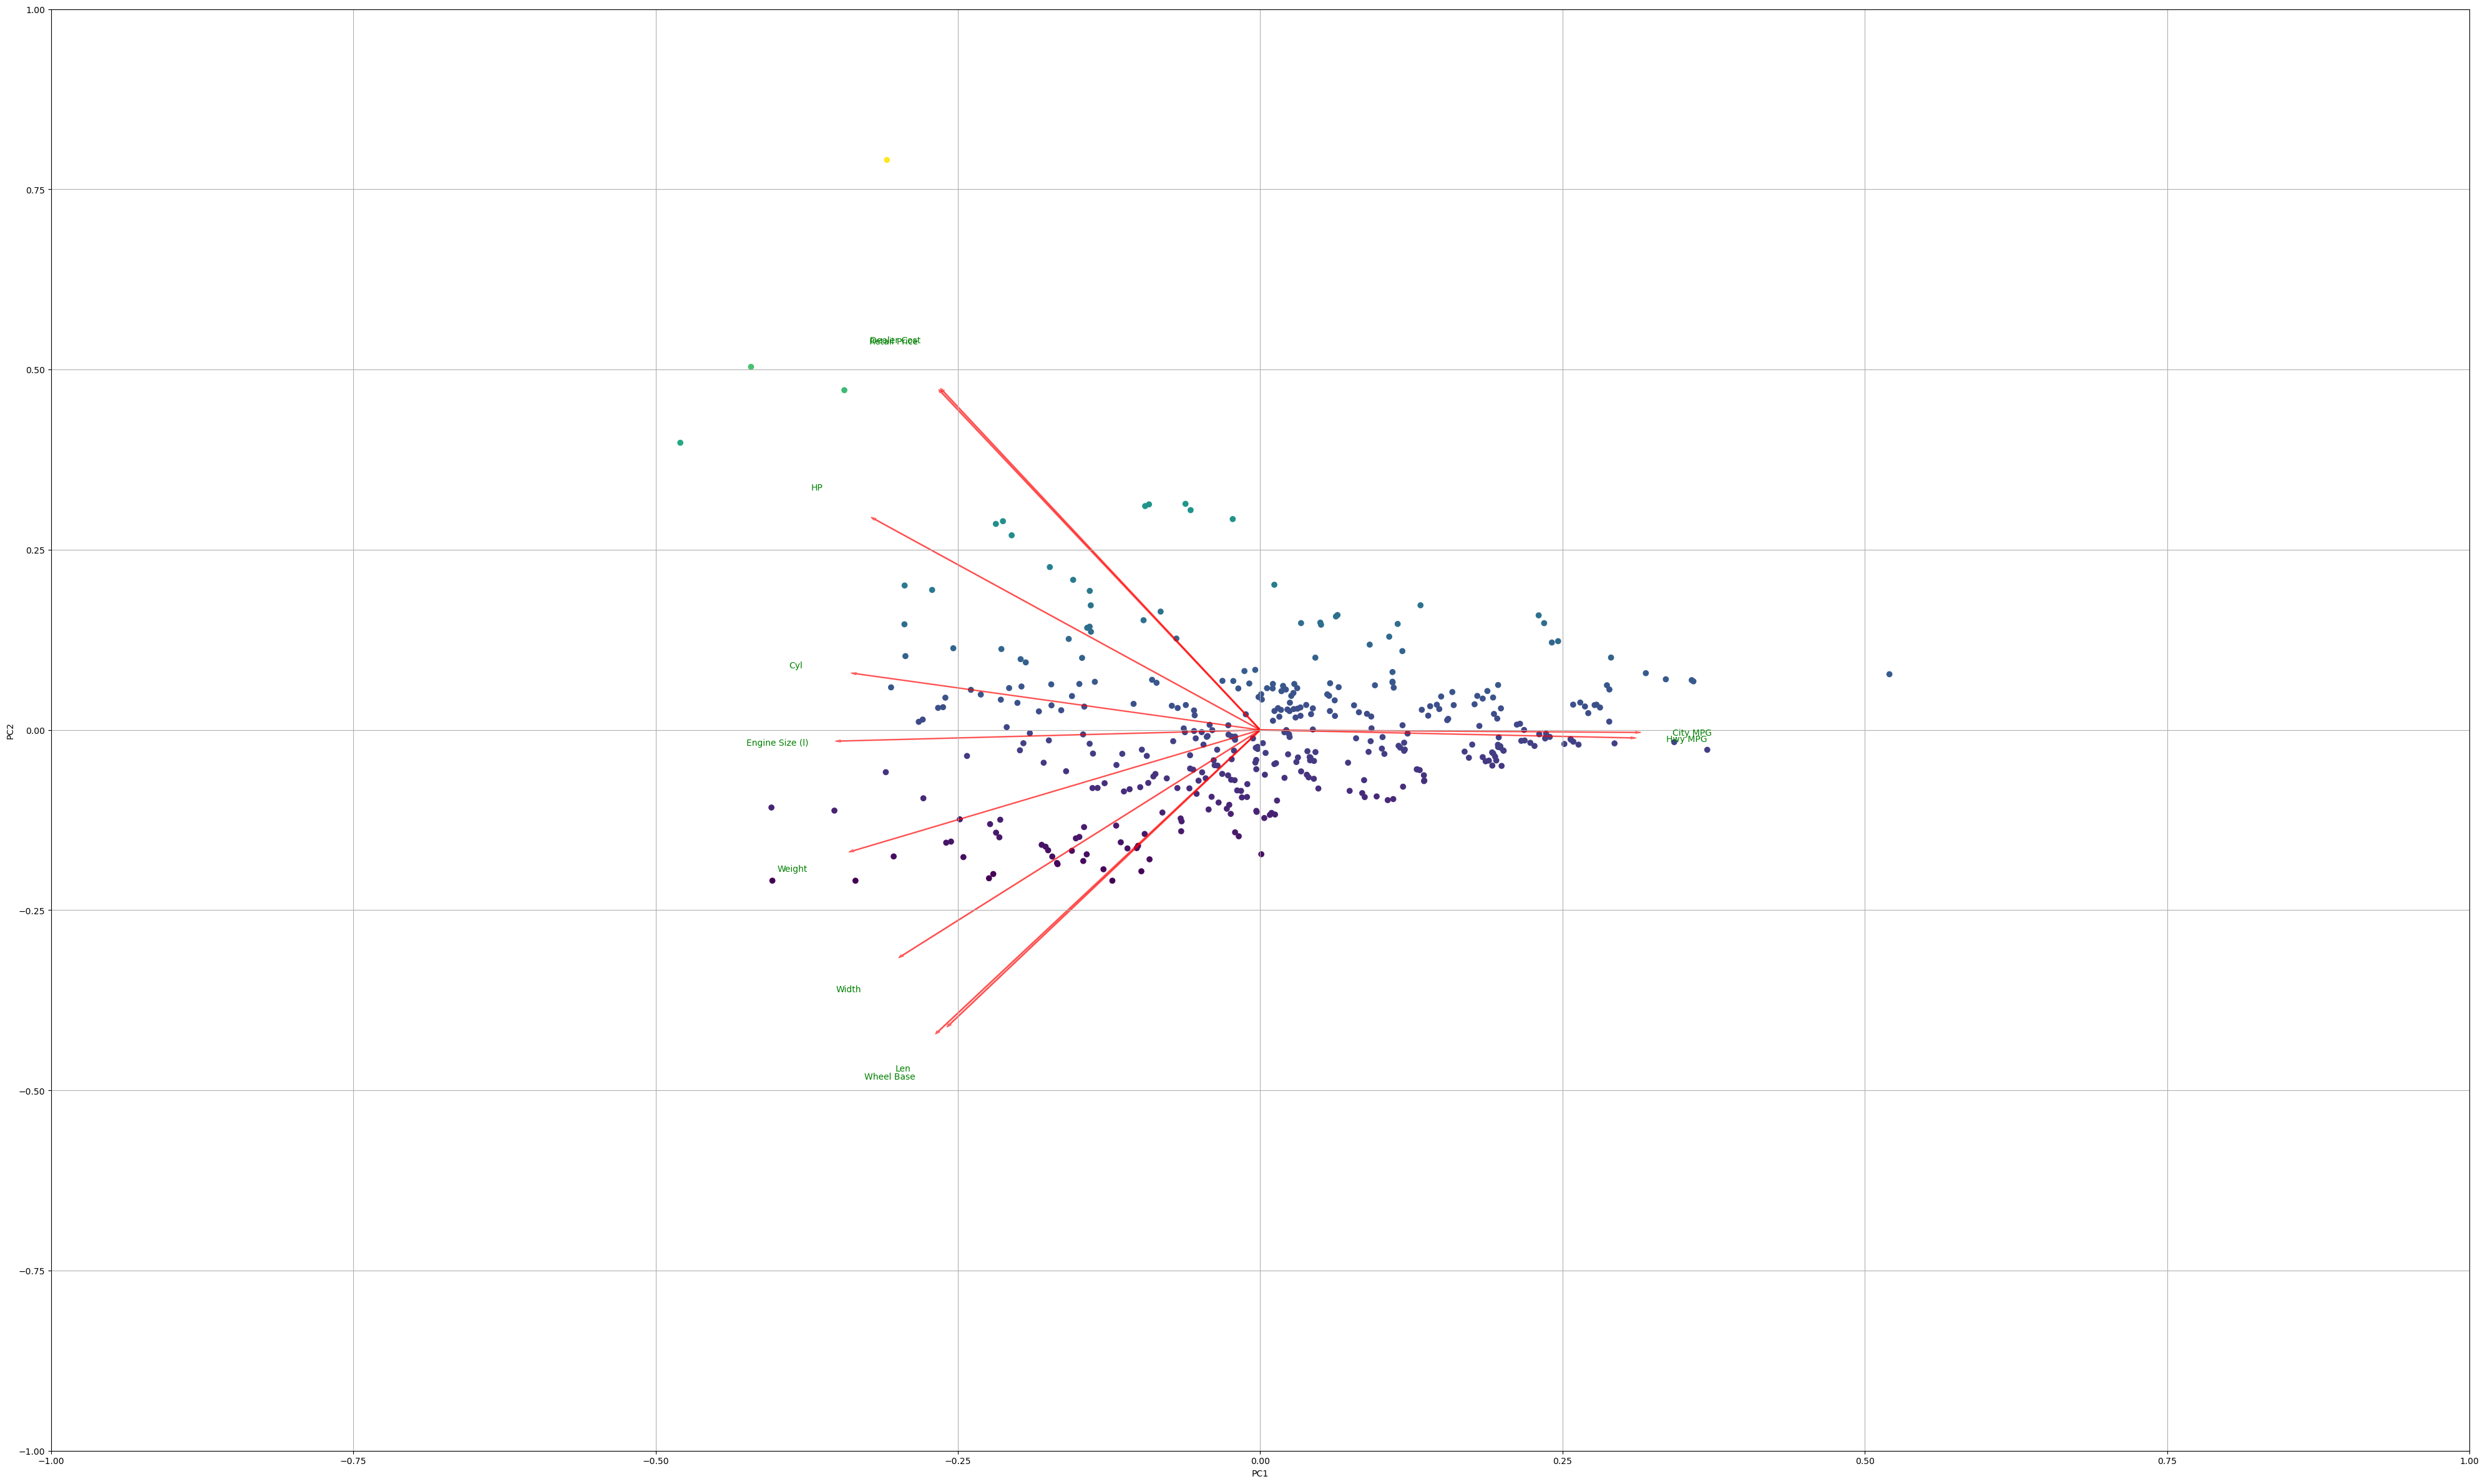

In [103]:
# biplot article: https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e
def biplot(score,coeff,labels):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(50,30))
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(X_pca[:,0:2], np.transpose(pca.components_[0:2, :]), attributes)
plt.show()
# Biplot confirmed the previous observation, at the top are expensive and sports cars, at the bottom are large cars, and on the right we have urban, economical cars